In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [2]:
import os
import pandas as pd
from exp_tools import *
import numpy as np

In [3]:
# 遞迴尋找所有 csv
def find_all_csv_files(root_dir):
    map_csv_files = {}
    for dirpath, _, filenames in os.walk(root_dir):
        for f in filenames:
            if f.endswith('.csv'):
                map_csv_files[os.path.splitext(f)[0]] = os.path.join(dirpath, f)
    return map_csv_files

root_dir = 'instance'
instance_files = find_all_csv_files(root_dir)
print(instance_files)
print(len(instance_files))

{'baseline_ai4i2020': 'instance/baseline_ai4i2020.csv', 'PMDI_imputed_rolling_mean': 'instance/imputed_data/rolling/PMDI_imputed_rolling_mean.csv', 'PMDI_imputed_rolling_regression': 'instance/imputed_data/rolling/PMDI_imputed_rolling_regression.csv', 'PMDI_imputed_rolling_knn': 'instance/imputed_data/rolling/PMDI_imputed_rolling_knn.csv', 'PMDI_imputed_rolling_median': 'instance/imputed_data/rolling/PMDI_imputed_rolling_median.csv', 'PMDI_imputed_linear_knn': 'instance/imputed_data/linear/PMDI_imputed_linear_knn.csv', 'PMDI_imputed_linear_median': 'instance/imputed_data/linear/PMDI_imputed_linear_median.csv', 'PMDI_imputed_linear_mean': 'instance/imputed_data/linear/PMDI_imputed_linear_mean.csv', 'PMDI_imputed_linear_regression': 'instance/imputed_data/linear/PMDI_imputed_linear_regression.csv', 'PMDI_imputed_all-rolling': 'instance/imputed_data/all-rolling/PMDI_imputed_all-rolling.csv', 'PMDI_imputed_ffill_median': 'instance/imputed_data/ffill/PMDI_imputed_ffill_median.csv', 'PMDI_im

===== 處理 baseline_ai4i2020 =====


Tuning Models: 100%|██████████| 6/6 [00:45<00:00,  7.52s/it]


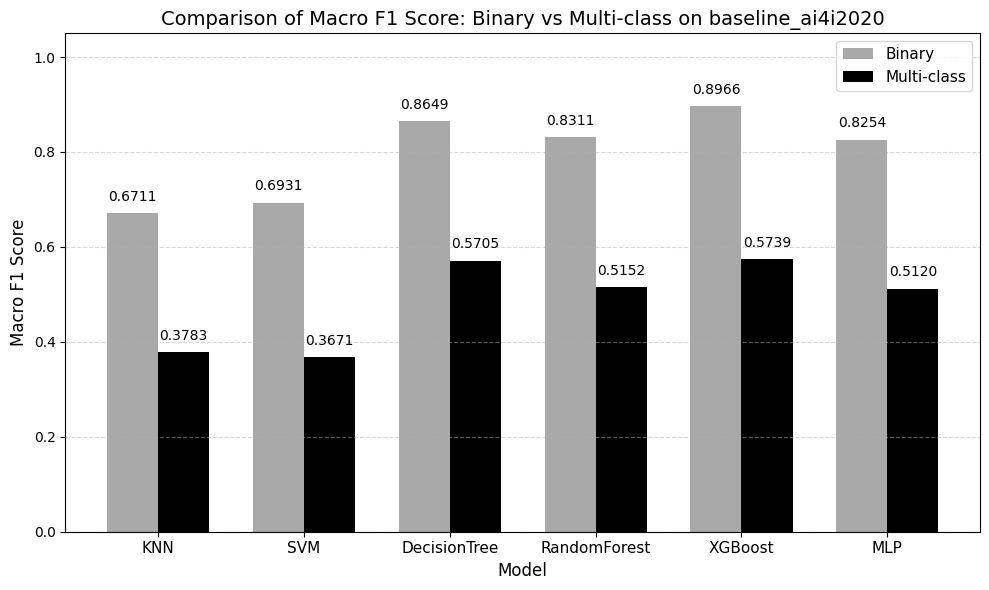

===== 處理 PMDI_imputed_rolling_mean =====


Tuning Models:  83%|████████▎ | 5/6 [00:26<00:05,  5.31s/it]


KeyboardInterrupt: 

In [4]:
all_results_bin = {}
all_results_multi = {}
np.seterr(all='ignore')

for fname in instance_files:
    print(f'===== 處理 {fname} =====')
    df = load_instance(instance_files[fname])
    df_processed = preprocess(df)
    (X_train_bin, X_test_bin, y_train_bin, y_test_bin,
     X_train_multi, X_test_multi, y_train_multi, y_test_multi) = split_train_test(df_processed)
    with suppress_warnings():
        # Binary
        results_bin = evaluate(X_train_bin, X_test_bin, y_train_bin, y_test_bin, task='binary')
        # Multi-class
        results_multi = evaluate(X_train_multi, X_test_multi, y_train_multi, y_test_multi, task='multiclass')
    all_results_bin[fname] = results_bin['F1']
    all_results_multi[fname] = results_multi['F1']
    # 可選：每個 instance 畫一次 F1 比較圖
    plot_f1_comparison(results_bin, results_multi, fname)

In [ ]:
# 彙總所有 instance 的 F1 分數
summary_bin = pd.DataFrame(all_results_bin)
summary_multi = pd.DataFrame(all_results_multi)

print('===== 各 instance 的 Binary F1 分數 =====')
display(summary_bin)
print('===== 各 instance 的 Multi-class F1 分數 =====')
display(summary_multi)

===== 各 instance 的 Binary F1 分數 =====


,baseline_ai4i2020,PMDI_imputed_rolling_mean,PMDI_imputed_rolling_regression,PMDI_imputed_rolling_knn,PMDI_imputed_rolling_median,PMDI_imputed_linear_knn,PMDI_imputed_linear_median,PMDI_imputed_linear_mean,PMDI_imputed_linear_regression,PMDI_imputed_all-rolling,PMDI_imputed_ffill_median,PMDI_imputed_ffill_regression,PMDI_imputed_ffill_knn,PMDI_imputed_ffill_mean
KNN,0.666161,0.912542,0.86684,0.86684,0.912542,0.888516,0.901664,0.901664,0.86684,0.757731,0.903151,0.86684,0.86684,0.903151
SVM,0.785745,0.925026,0.876427,0.883076,0.912542,0.86684,0.929491,0.933892,0.876427,0.794344,0.912542,0.876427,0.876427,0.925026
DecisionTree,0.904592,0.918054,0.931913,0.91329,0.90648,0.911222,0.902783,0.91056,0.931913,0.844302,0.91329,0.931913,0.931913,0.918054
RandomForest,0.83111,0.90648,0.898347,0.896774,0.907882,0.901664,0.913823,0.914612,0.898347,0.869986,0.904592,0.898347,0.898347,0.914612
XGBoost,0.872,0.94516,0.942504,0.929491,0.94081,0.936394,0.928444,0.94516,0.942504,0.882083,0.930876,0.942504,0.942504,0.947933
MLP,0.797227,0.911926,0.885275,0.878374,0.908452,0.883851,0.937326,0.939923,0.885275,0.828576,0.905032,0.885275,0.885275,0.921548


===== 各 instance 的 Multi-class F1 分數 =====


,baseline_ai4i2020,PMDI_imputed_rolling_mean,PMDI_imputed_rolling_regression,PMDI_imputed_rolling_knn,PMDI_imputed_rolling_median,PMDI_imputed_linear_knn,PMDI_imputed_linear_median,PMDI_imputed_linear_mean,PMDI_imputed_linear_regression,PMDI_imputed_all-rolling,PMDI_imputed_ffill_median,PMDI_imputed_ffill_regression,PMDI_imputed_ffill_knn,PMDI_imputed_ffill_mean
KNN,0.457517,0.686067,0.566568,0.563295,0.686067,0.602633,0.679257,0.682964,0.566568,0.53399,0.678573,0.566568,0.566568,0.678573
SVM,0.515948,0.620892,0.577527,0.581054,0.611222,0.594795,0.626189,0.631944,0.577527,0.543867,0.611222,0.577527,0.577527,0.620892
DecisionTree,0.570534,0.677391,0.692325,0.691092,0.674897,0.682059,0.73269,0.679054,0.692325,0.568933,0.677391,0.692325,0.692325,0.683343
RandomForest,0.515206,0.675928,0.626263,0.649224,0.685206,0.691954,0.675666,0.720564,0.626263,0.553576,0.709159,0.626263,0.626263,0.706622
XGBoost,0.570835,0.705263,0.647797,0.652152,0.710366,0.652109,0.675219,0.677409,0.647797,0.596746,0.654019,0.647797,0.647797,0.654019
MLP,0.511964,0.678236,0.584651,0.585678,0.673151,0.659635,0.665128,0.633374,0.584651,0.564355,0.610169,0.584651,0.584651,0.673151


Exception ignored in: <function ResourceTracker.__del__ at 0x1057e9f80>
Traceback (most recent call last):
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x110859f80>
Traceback (most recent call last):
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
Chi